# Experiment: Assignment probabilities through episodes

1. Load a SATLIB formula with 20 variables and 91 clauses
* n = 20
* k = 91
* r = 

In [1]:
import torch
import torch.optim as optim

from src.generator import UniformGenerator
from src.run_solvers import random_solver, learning_solver

from src.train import train
#from src.train import train
import src.utils as utils

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



import os

from tbparse import SummaryReader

In [2]:
config = {
    # Architecture
    "cell": 'GRU',
    "hidden_size": 128,
    "num_layers": 1,
    
    ## Embeddings
    "embedding_size": 64,

    ## Regularization
    "dropout": 0,

    # Training hyperparameters
    "accumulation_steps": 5,
    "lr": 0.00015,
    "baseline": -1,  # None, -1, 1, 2, 3, 4, 5
    "clip_grad": 1,
    "entropy_weight": 10,
    "num_episodes": 5000,
    "gpu": True,
    "verbose": 2,
    "raytune": False,
    "episode_logs": 'probs',  # 'probs', 'loss_and_sat'
    "logs_steps": 100,  # 1, 2,... 

    "checkpoint_dir": None,
    "data_dir": os.path.abspath('data/uf20-91/uf20-01.cnf')
}

learning_solver(config, checkpoint_dir=config['checkpoint_dir'], data_dir=config['data_dir'])


Greedy actions: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Optim step 1, Episode [5/5000], Mean loss -175.1859,  Mean num sat 78.2000, Val num sat 81.0000

Greedy actions: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Optim step 2, Episode [10/5000], Mean loss -149.4649,  Mean num sat 80.2000, Val num sat 81.0000

Greedy actions: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Optim step 3, Episode [15/5000], Mean loss -119.0612,  Mean num sat 82.4000, Val num sat 81.0000

Greedy actions: [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Optim step 4, Episode [20/5000], Mean loss -104.6690,  Mean num sat 83.4000, Val num sat 81.0000

Greedy actions: [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Optim step 5, Episode [25/5000], Mean loss -102.3747,  Mean num sat 83.6000, Val num sat 81.0000

Greedy actions: [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Optim step 6, Episode [30/5000], Mean loss -158.

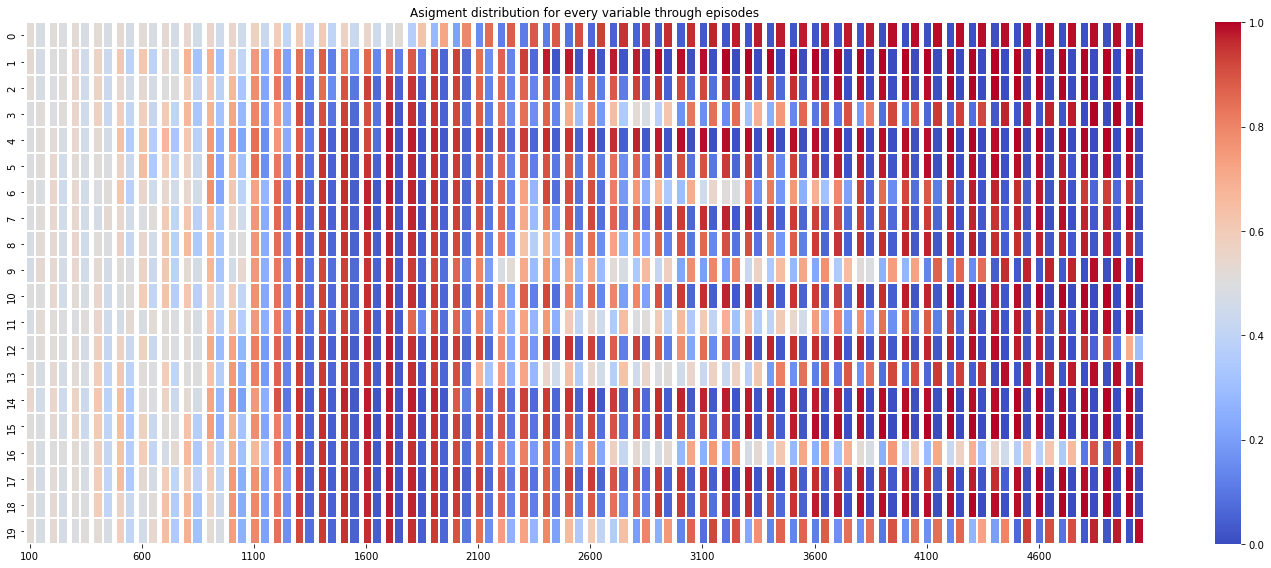

In [2]:
log_dir = "outputs/exp_1/"
reader = SummaryReader(log_dir, pivot=False)
#reader = SummaryReader(log_dir, extra_columns={'dir_name'})
df = reader.tensors

df2 = df.sort_values(['step', 'tag'], ascending = [True, True])
probs =  df2["value"].to_numpy(copy=True)
probs = probs.reshape(-1,20).T

colormap = sns.color_palette("coolwarm", as_cmap=True)
plt.figure(figsize = (20,8))
ax = sns.heatmap(probs, vmin=0, vmax=1, square=False,  xticklabels=10, linewidths=0.1, cmap=colormap)
for i in range(0, 102 ,2):
    ax.axvline(i, color='white', lw=5)

ax.set(title='Asigment distribution for every variable through episodes')
ax.set_xticklabels([i for i in range(100, 5000+1, 500)])
plt.tight_layout()
plt.savefig('img/solving_SATLIB91.png')
plt.show()
